In [ ]:
%run model_01.ipynb

Running our model with our added path to produce FAEE. 

In [2]:
from dfba import DfbaModel, ExchangeFlux, KineticVariable
from dfba.plot.matplotlib import *

To be able to run dfba package a new conda enviroment had to be created, as there were issues with installings and all dependecies. The creation of enviroment took some time. Using the provided docs, we emulated the provided examples for our model.

In [ ]:
model.objective = model.reactions.BIOMASS_Ec_iML1515_core_75p37M
Biomassobjective = model.optimize().objective_value 


In [4]:
fba_model = model
fba_model.reactions.BIOMASS_Ec_iML1515_core_75p37M.lower_bound = Biomassobjective*0.2
fba_model.objective = "DM_faee"
fba_model.solver = "glpk"
dfba_model = DfbaModel(fba_model)

Biomass  objective was lowered to keep with the realistic expectations.

In [ ]:
X = KineticVariable("Biomass")
Glc = KineticVariable("Glucose")
Faee = KineticVariable("FAEE")
Oxy = KineticVariable("Oxygen")

dfba_model.add_kinetic_variables([X, Glc, Faee, Oxy])

Variables of metabolites and biomass had to be introduced and added to the dfba_model.

In [6]:
mu = ExchangeFlux("BIOMASS_Ec_iML1515_core_75p37M")
v_G = ExchangeFlux("EX_glc__D_e")
v_F = ExchangeFlux("DM_faee")
v_O = ExchangeFlux("EX_o2_e")

dfba_model.add_exchange_fluxes([mu, v_G, v_F, v_O])

Variables of reactions and biomass had to be introduced and added to the dfba_model.

In [7]:
dfba_model.add_rhs_expression("Biomass", mu * X)
dfba_model.add_rhs_expression("Glucose", v_G * 180.1559/1000 * X)
dfba_model.add_rhs_expression("FAEE", v_F * 312.53/1000.0 * X)
dfba_model.add_rhs_expression("Oxygen", 0) # 

In [8]:

dfba_model.add_exchange_flux_lb("DM_faee", 0.5 * (Faee / (0.2 + Faee)), Faee)  



Exchange flux reaction only for the reaction producing FAEE, the numbers are only guesstimates, as we could not find any realiable numbers

In [9]:
with model:
    dfba_model.add_initial_conditions({"Biomass": 1, "Glucose": 10, "FAEE": 0.0, "Oxygen": 20})
    concentrations, trajectories = dfba_model.simulate(0.0, 10, 0.1, ["EX_glc__D_e","EX_o2_e","DM_faee"])

GLPK Simplex Optimizer, v4.65
1878 rows, 5434 columns, 21164 non-zeros
*     0: obj =  -0.000000000e+00 inf =   7.190e-18 (1)
*    35: obj =   8.429920904e-01 inf =   3.246e-14 (0)
OPTIMAL LP SOLUTION FOUND


Final Run Statistics: 

Number of steps                    = 0
Number of residual evaluations     = 0
Number of Jacobian evaluations     = 18
Number of nonlinear iterations     = 0
Number of error test failures      = 0
Number of nonlinear conv. failures = 0
Number of root fn. evaluations     = 0

Total simulation time was 2.24098 seconds



Using the GLPK simplex optimizer, optimal solution was found.

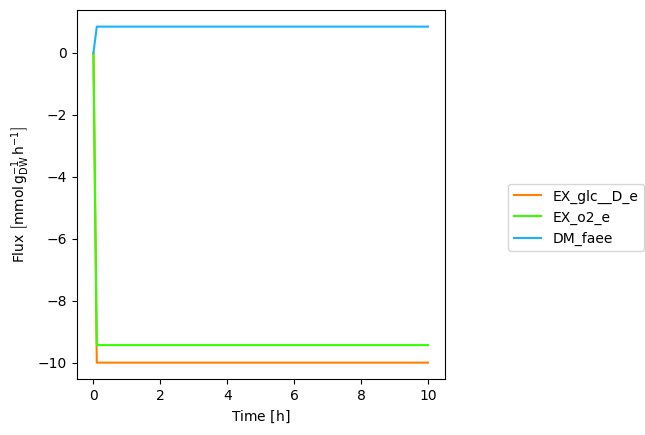

In [10]:
plot_trajectories(trajectories)


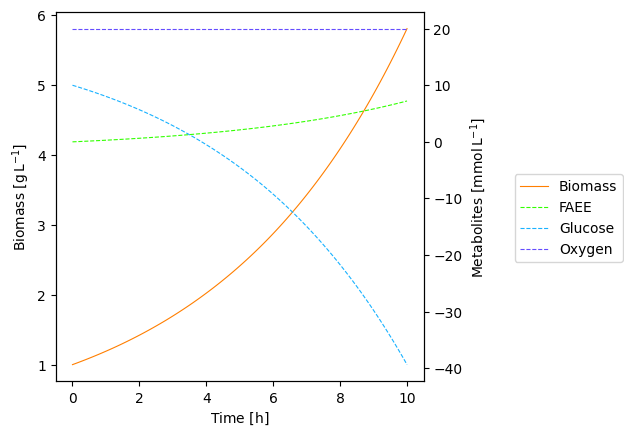

In [11]:
plot_concentrations(concentrations)

Plots of concentrations and trajectories, that agree with our estimates. The main obstacle was installing the dfba package as that took lot of time and googling.